# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [13]:
from helper import *
from time_analysis import *

In [14]:
df = pd.read_csv('dataset_management\data\clean\clean_lagged.csv', parse_dates=['Timestamp'])


In [23]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Timestamp                       45957 non-null  datetime64[ns]
 1   DK_1_imports                    45957 non-null  float64       
 2   SE_4_imports                    45957 non-null  float64       
 3   DK_1_exports                    45957 non-null  float64       
 4   SE_4_exports                    45957 non-null  float64       
 5   Day_Ahead_price                 45957 non-null  float64       
 6   Forecasted_Load                 45957 non-null  float64       
 7   Actual_Load                     45957 non-null  float64       
 8   Solar_[MW]                      45957 non-null  float64       
 9   ttf_price                       45957 non-null  float64       
 10  coal_price                      45957 non-null  float64       
 11  co

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

In [28]:

model=fit_arima_fun(df.Day_Ahead_price,8,8,seasonal=True,print_summary=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=552481.511, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=400195.680, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=497790.463, Time=6.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=577256.706, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=394295.145, Time=0.74 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=394285.320, Time=0.96 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=393731.136, Time=2.10 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=392959.918, Time=2.54 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=392172.382, Time=3.14 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=391249.214, Time=4.03 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=390441.441, Time=5.36 sec
 ARIMA(8,0,1)(0,0,0)[0] intercept   : AIC=390024.590, Time=53.82 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=390157.906, Time=49.10 sec
 ARIMA(8,0,2)(0,0,0)[0] intercept   : AIC=390159.512, Time=58.73 sec


In [27]:
#model arima normal 8,0,1


ARIMA(order=(8, 0, 1), scoring_args={}, suppress_warnings=True)

# Splitting

## Option 1 - sklearn function

In [5]:
tscv = TimeSeriesSplit(gap = 24*30*0, n_splits = 3, test_size = 24*30*3, max_train_size = df.shape[0])
# gap: observations between train and test set -> 0 months
# n_splits: # of folds
# test_size: observations for test set -> 3 months
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=45957, n_splits=3, test_size=2160)


In [6]:
for i, (train_index, test_index) in enumerate(tscv.split(df['Timestamp'])):
    print(f"Fold {i}:")
    print(f"  Train: index = {train_index}")
    print(f"  Test:  index = {test_index}")
    
    X_train = df.iloc[train_index].copy()
    X_test = df.iloc[test_index].copy()
    
    plt.plot(X_train['Day-ahead prices'], label = 'Train F'+str(i+1), linewidth = 0.5)
    plt.plot(X_test['Day-ahead prices'], label = 'Test F'+str(i+1), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()


Fold 0:
  Train: index = [    0     1     2 ... 39474 39475 39476]
  Test:  index = [39477 39478 39479 ... 41634 41635 41636]


KeyError: 'Day-ahead prices'

## Option 2 - manually

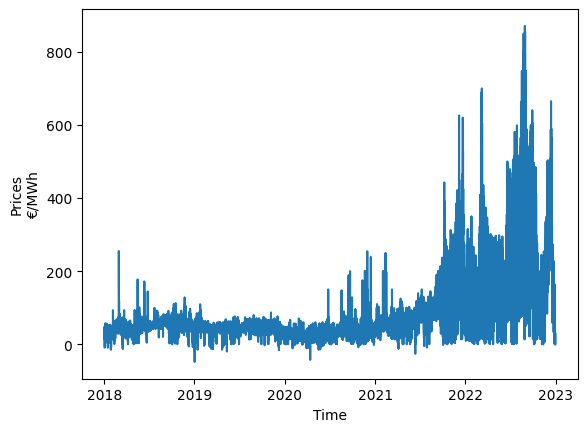

In [7]:
plt.plot(df['Timestamp'], df['Day-ahead prices'])
plt.xlabel('Time')
plt.ylabel('Prices\n€/MWh')
plt.show()

Fold 1: train 01/01/2018 - 31/12/2020, test 01/01/2021 - 31/03/2021<br>
Fold 2: train 01/01/2018 - 30/06/2021, test 01/07/2021 - 30/09/2021<br>
Fold 3: train 01/01/2017 - 31/08/2022, test 01/09/2022 - 31/12/2022

In [8]:
train_start = ['2018-01-01', '2018-01-01', '2018-01-01']
train_end = ['2020-12-31', '2021-06-20', '2022-08-31']

test_start = ['2021-01-01', '2021-07-01', '2022-09-01']
test_end = ['2021-03-31', '2021-09-30', '2022-12-31']

In [9]:
df2 = df.set_index('Timestamp')

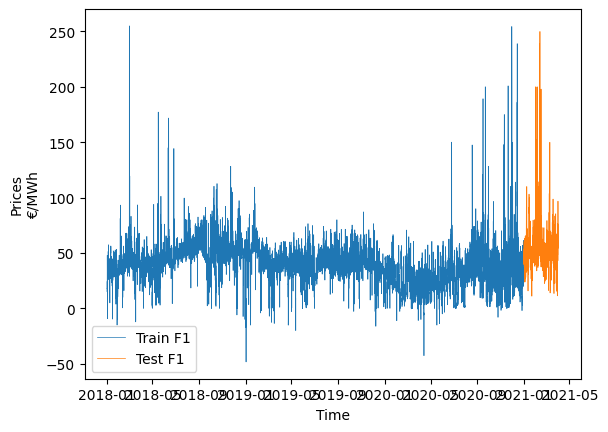

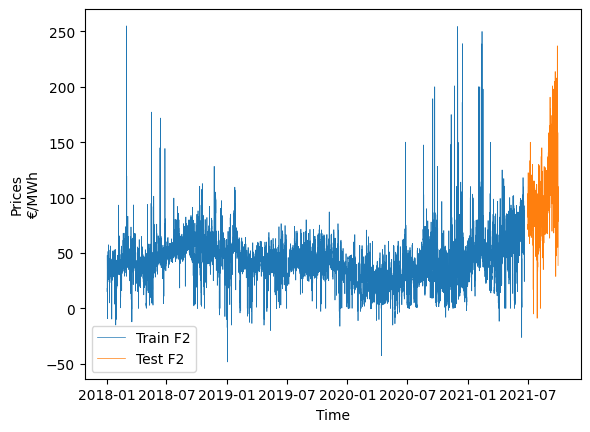

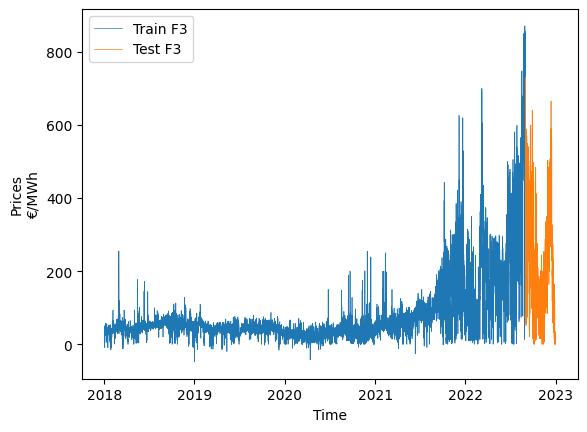

In [10]:
i = 1
for tr_s, tr_e, te_s, te_e in (zip(train_start, train_end, test_start, test_end)):
    
    X_train, X_test = split_timeseries(df2, tr_s, tr_e, te_s, te_e)
    
    plt.plot(X_train['Day-ahead prices'], label = 'Train F'+str(i), linewidth = 0.5)
    plt.plot(X_test['Day-ahead prices'], label = 'Test F'+str(i), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()
    
    i += 1